# Assignment 5

## SIR model

### Numerical solution using Euler method

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, animation
import networkx as nx
import random
import os
import imageio
import glob
from PIL import Image

In [109]:
N = 10**6
R0_DICT = {0: 'epidemic', 1: 'no epidemic'}

In [94]:
def SIR_euler(beta, r, N=10**6, h=1, n=1000):
    """
    Function to generate numeric solution to SIR model using Euler method for different values of:
    
    * beta (float) - infectivity parameter
    * r (float) - recovery rate per capita
    * N (int) - population size
    * h (float) - time step for euler calculation (usually called dt)
    * n (int) - number of time steps
    """
    S = np.zeros(n)
    I = np.zeros(n)
    R = np.zeros(n)
    S[0] = N
    I[0] = 1
    R[0] = 0
    for i in range(1, n):
        S[i] = S[i-1] + h*((-beta)*S[i-1]*I[i-1])
        I[i] = I[i-1] + h*(beta*S[i-1]*I[i-1] - r*I[i-1])
        R[i] = R[i-1] + h*(r*I[i-1])
    df = pd.DataFrame(list(zip(list(range(0, n)), S, I, R)),
               columns =['t', 'susceptible', 'infected', 'recovered'])
    return df

In [85]:
beta1 = 0.00005
r1 = 0.4
df1 = SIR_euler(beta1, r1, 10**6, 0.003)

R_0 = 125.0


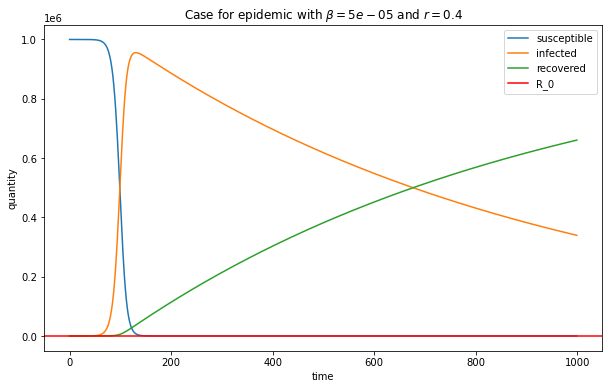

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(df1['t'], df1['susceptible'], label='susceptible')
plt.plot(df1['t'], df1['infected'], label='infected')
plt.plot(df1['t'], df1['recovered'], label='recovered')
plt.axhline(beta1*N/r1, color='r', label='R_0')
plt.legend()
plt.xlabel('time')
plt.ylabel('quantity')
plt.title(fr'Case for {R0_DICT[0] if beta1*N/r1>1 else R0_DICT[1]} with $\beta = {beta1}$ and $r = {r1}$')
print(f"R_0 = {beta1*N/r1}")

In [88]:
beta2 = 0.0000004
r2 = 0.7
df2 = SIR_euler(beta2, r2, 10**6, 0.001)

R_0 = 0.5714285714285714


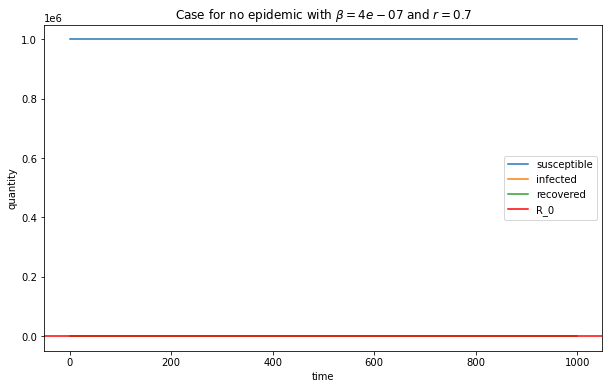

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(df2['t'], df2['susceptible'], label='susceptible')
plt.plot(df2['t'], df2['infected'], label='infected')
plt.plot(df2['t'], df2['recovered'], label='recovered')
plt.axhline(beta2*N/r2, color='r', label='R_0')
plt.legend()
plt.xlabel('time')
plt.ylabel('quantity')
plt.title(fr'Case for {R0_DICT[0] if beta2*N/r2>1 else R0_DICT[1]} with $\beta = {beta2}$ and $r = {r2}$')
print(f"R_0 = {beta2*N/r2}")

In [90]:
beta3 = 0.00008
r3 = 0.6
df3 = SIR_euler(beta3, r3, 10**6, 0.003)

R_0 = 133.33333333333334


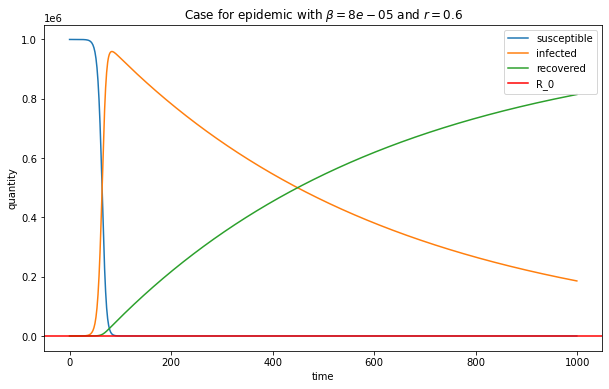

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(df3['t'], df3['susceptible'], label='susceptible')
plt.plot(df3['t'], df3['infected'], label='infected')
plt.plot(df3['t'], df3['recovered'], label='recovered')
plt.axhline(beta3*N/r3, color='r', label='R_0')
plt.legend()
plt.xlabel('time')
plt.ylabel('quantity')
plt.title(fr'Case for {R0_DICT[0] if beta3*N/r3>1 else R0_DICT[1]} with $\beta = {beta3}$ and $r = {r3}$')
print(f"R_0 = {beta3*N/r3}")

In [111]:
beta4 = 0.0000009
r4 = 0.2
df4 = SIR_euler(beta4, r4, 10**6, 0.003)

R_0 = 4.499999999999999


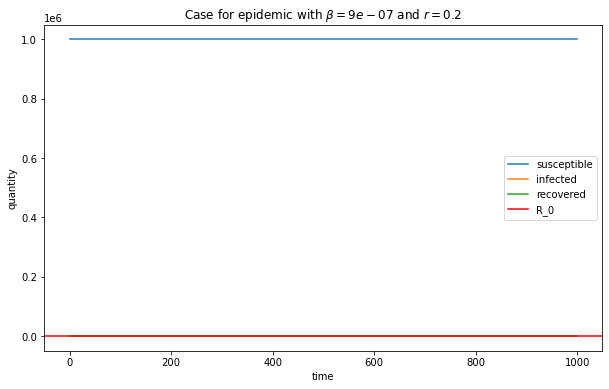

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(df4['t'], df4['susceptible'], label='susceptible')
plt.plot(df4['t'], df4['infected'], label='infected')
plt.plot(df4['t'], df4['recovered'], label='recovered')
plt.axhline(beta4*N/r4, color='r', label='R_0')
plt.legend()
plt.xlabel('time')
plt.ylabel('quantity')
plt.title(fr'Case for {R0_DICT[0] if beta4*N/r4>1 else R0_DICT[1]} with $\beta = {beta4}$ and $r = {r4}$')
print(f"R_0 = {beta4*N/r4}")

### Phase portrait

In [34]:
def f(Y, beta, r):
    """
    Function to calculate the values needed for the phase portrait of SI model
    
    *Y (tuple) - values to calculate the function for
    * beta (float) - infectivity parameter
    * r (float) - recovery rate per capita
    """
    return np.array([-beta*Y[0]*Y[1], beta*Y[0]*Y[1] - r*Y[1]])

In [52]:
def phase_portrait(beta, r, N=100):
    """
    Function generates phase portrait for given parameters
    
    * beta (float) - infectivity parameter
    * r (float) - recovery rate per capita
    * N (int) - population size (=100)
    """
    scale = 1
    y1 = np.linspace(1, N, 20)
    y2 = np.linspace(1, N, 20)
    x, y = np.meshgrid(y1, y2)
    S = np.zeros((x.shape[0], x.shape[1]))
    I = np.zeros((x.shape[0], x.shape[1]))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            Yprime = f([x[i, j], y[i, j]], beta, r)
            S[i, j] = Yprime[0]*scale
            I[i, j] = Yprime[1]*scale
    plt.figure(figsize=(10, 6))
    plt.quiver(x, y, S, I)
    plt.title(fr'Phase portrait for $\beta = {beta}$, $r = {r}$ and $N = {N}$ $(R_0 = {round(beta*N/r, 3)})$')
    plt.show()

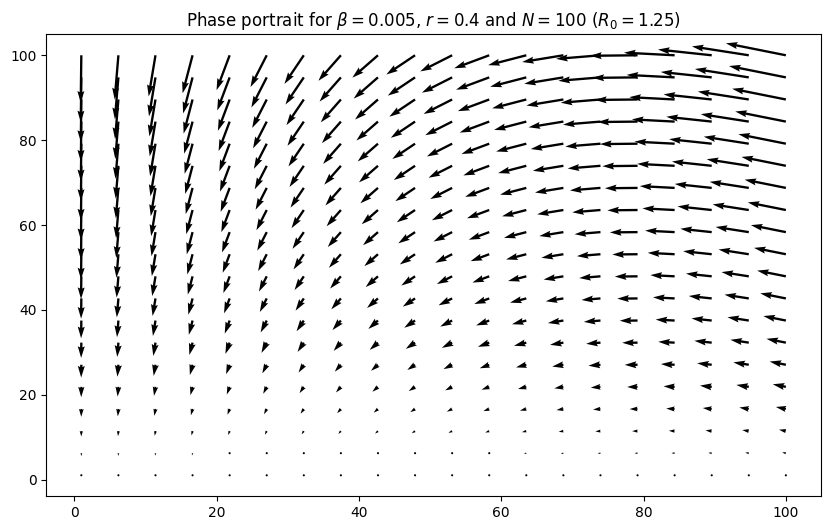

In [53]:
phase_portrait(0.005, 0.4)

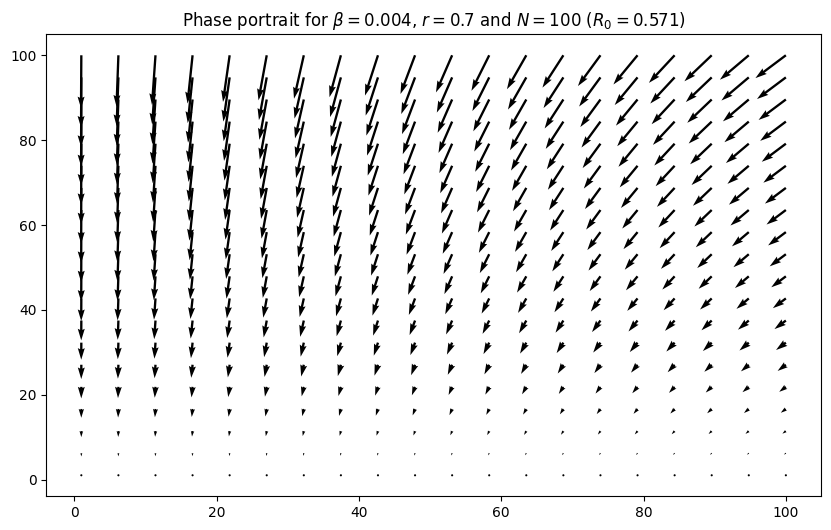

In [54]:
phase_portrait(0.004, 0.7)

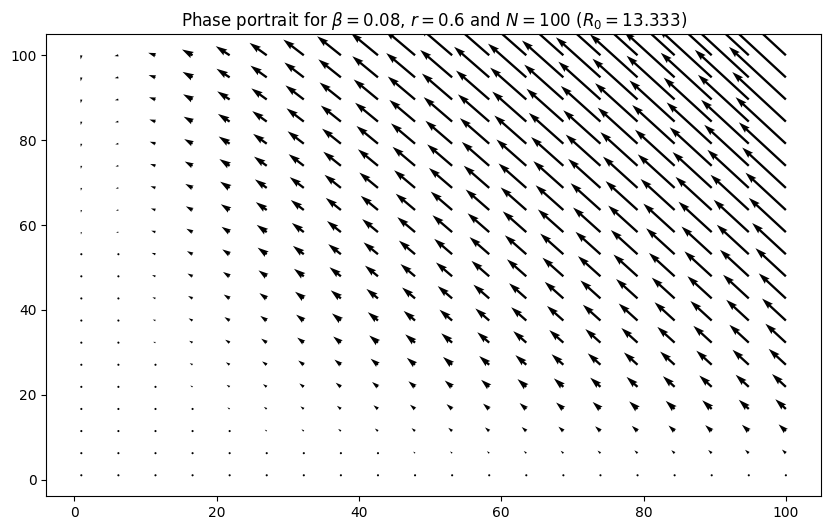

In [55]:
phase_portrait(0.08, 0.6)

### Analysis of total number of infected individuals for $R_0$ parameter

In [81]:
def SIR_analysis_r(betas, rs, N=10**6):
    """
    Function to generate the plot of total infected individuals depending on R_0 parameter
    
    * beta (list) - values for infectivity parameter
    * r (list) - values for recovery rate per capita
    * N (int) - population size
    """
    R_0 = np.zeros((len(betas), len(rs)))
    results = np.zeros((len(betas), len(rs)))
    for b in range(len(betas)):
        R_0[b] = [betas[b]*N/r for r in rs]
        for r in range(len(rs)):
            results[b][r] = SIR_euler(betas[b], rs[r], N=10**6, h=0.01, n=1000)['infected'].max()

        plt.plot(R_0[b], results[b], label=f'beta = {betas[b]}')
    plt.legend()
    plt.xlabel(r'$R_0$')
    plt.ylabel('Max. number of infected')
    plt.title('Total number of infections for different parameters')
    plt.show()

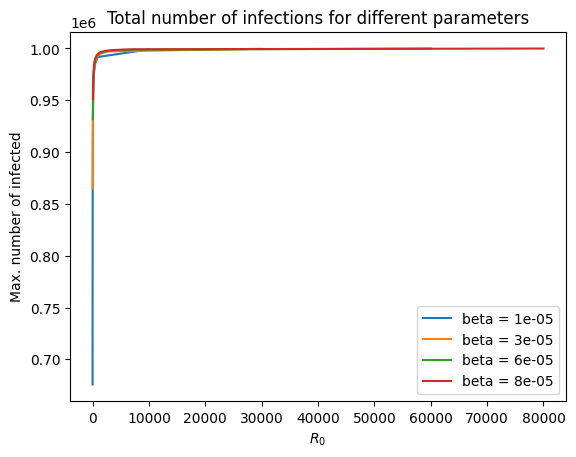

In [82]:
r_range = np.linspace(0.001, 0.999, 100)
beta_range = [0.00001, 0.00003, 0.00006, 0.00008]
SIR_analysis_r(beta_range, r_range)

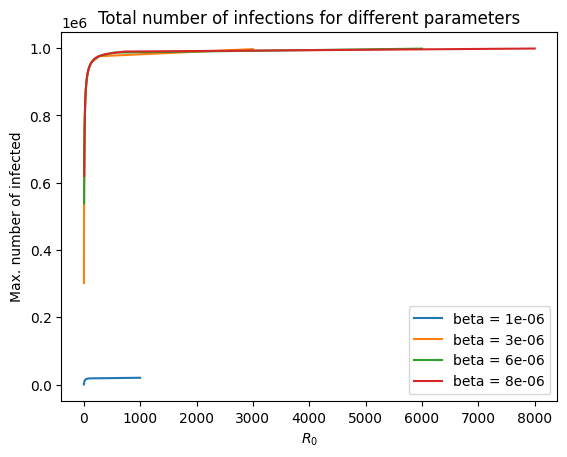

In [83]:
r_range = np.linspace(0.001, 0.999, 100)
beta_range = [0.000001, 0.000003, 0.000006, 0.000008]
SIR_analysis_r(beta_range, r_range)

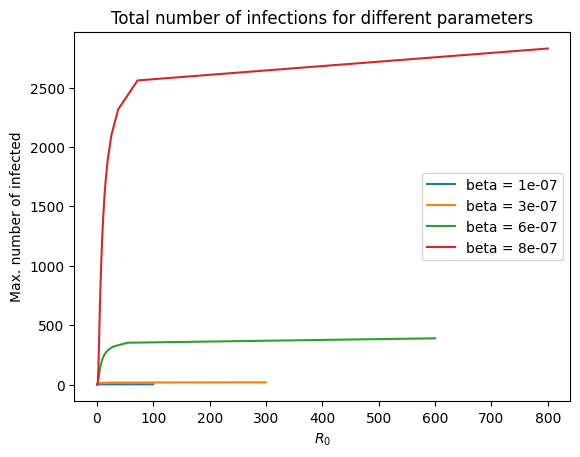

In [84]:
r_range = np.linspace(0.001, 0.999, 100)
beta_range = [0.0000001, 0.0000003, 0.0000006, 0.0000008]
SIR_analysis_r(beta_range, r_range)

## SIR model on a network

### Simulation of SIR model on different graphs

In [9]:
def SIR_on_graph(G, p, starting_node=0, measures=False):
    """
        Function that generates SIR model simulations on a graph with arguments:
        
        *G (networkx.Graph()) - graph to simulate the model on
        *p (float) - probability of infection
        *starting_node (int or tuple) - first infected node
        *measures (bool) - determines the output of function
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')

    if starting_node == 'random':
        starting_node = random.choice(list(G.nodes()))
    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    N = nx.number_of_nodes(G)
    infected_list = [starting_node]
    infected_fraction = [len(infected_list)/N]
    t = 0
    while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R'] and len(infected_list)!=0:
        new_infected_list = []
        for node in infected_list:
            d[node] = 'R'
            for new_infected in G.neighbors(node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) < p:
                    d[new_infected] = 'I'
                    new_infected_list.append(new_infected)
        nx.set_node_attributes(G, d, 'state')
        infected_list = new_infected_list
        infected_fraction.append(len(infected_list)/N)
        t += 1
    if measures:
        time_of_max_inf = infected_fraction.index(max(infected_fraction))
        total_proportion = list(nx.get_node_attributes(G, 'state').values()).count('R')/nx.number_of_nodes(G)
        return total_proportion, t, time_of_max_inf

    return G, infected_fraction

In [120]:
L2D = nx.grid_2d_graph(10, 10)
RG = nx.erdos_renyi_graph(100, 0.04)
WSM = nx.watts_strogatz_graph(100, 4, 0.4)
BAM = nx.barabasi_albert_graph(100, 2)

### Analysis of infected fraction

In [117]:
def SIR_on_graph_MC(G, p, steps, starting_node=0):
    """
    Function to perform Monte Carlo simulations of SIR model on a graph. Returns the infected fraction depending on p
    
    * G (networkx.Graph()) - graph to perform SIR model simulations on
    * p (float, 0 < p < 1) - probability of infection
    * steps (int) - number of Monte Carlo steps
    * starting_node (int or tuple (for 2D lattice)) - first infected node
    """
    results = list(np.zeros(steps))
    for i in range(steps):
        _, infected = SIR_on_graph(G, p, starting_node)
        results[i] = infected
    df = pd.DataFrame(results)
        
    return df

In [121]:
L2D_infected_025 = SIR_on_graph_MC(L2D, 0.25, 10, (0, 0))
L2D_infected_067 = SIR_on_graph_MC(L2D, 0.67, 10, (0, 0))
L2D_infected_05 = SIR_on_graph_MC(L2D, 0.5, 10, (0, 0))
L2D_infected_075 = SIR_on_graph_MC(L2D, 0.75, 10, (0, 0))

Text(0, 0.5, 'Infected fraction')

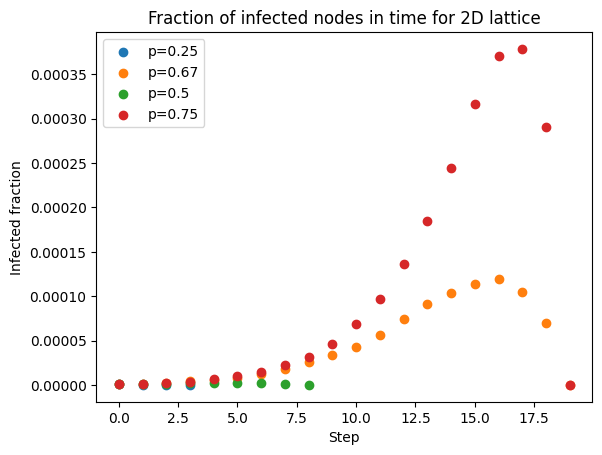

In [48]:
plt.scatter([i for i in range(L2D_infected_025.shape[1])], L2D_infected_025.mean(), label='p=0.25')
plt.scatter([i for i in range(L2D_infected_067.shape[1])], L2D_infected_067.mean(), label='p=0.67')
plt.scatter([i for i in range(L2D_infected_05.shape[1])], L2D_infected_05.mean(), label='p=0.5')
plt.scatter([i for i in range(L2D_infected_075.shape[1])], L2D_infected_075.mean(), label='p=0.75')
plt.title(r'Fraction of infected nodes in time for 2D lattice')
plt.xlabel('Step')
plt.legend()
plt.ylabel('Infected fraction')

In [122]:
RG_infected_025 = SIR_on_graph_MC(RG, 0.25, 100)
RG_infected_05 = SIR_on_graph_MC(RG, 0.5, 100)
RG_infected_075 = SIR_on_graph_MC(RG, 0.75, 100)

Text(0, 0.5, 'Infected fraction')

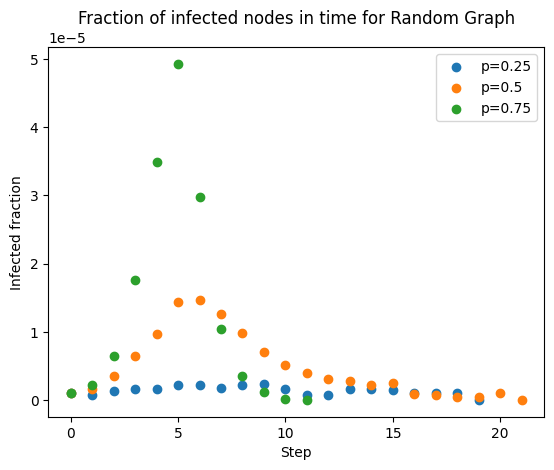

In [51]:
plt.scatter([i for i in range(RG_infected_025.shape[1])], RG_infected_025.mean(), label='p=0.25')
plt.scatter([i for i in range(RG_infected_05.shape[1])], RG_infected_05.mean(), label='p=0.5')
plt.scatter([i for i in range(RG_infected_075.shape[1])], RG_infected_075.mean(), label='p=0.75')
plt.title(r'Fraction of infected nodes in time for Random Graph')
plt.xlabel('Step')
plt.legend()
plt.ylabel('Infected fraction')

In [123]:
WSM_infected_025 = SIR_on_graph_MC(WSM, 0.25, 100)
WSM_infected_05 = SIR_on_graph_MC(WSM, 0.5, 100)
WSM_infected_075 = SIR_on_graph_MC(WSM, 0.75, 100)

Text(0, 0.5, 'Infected fraction')

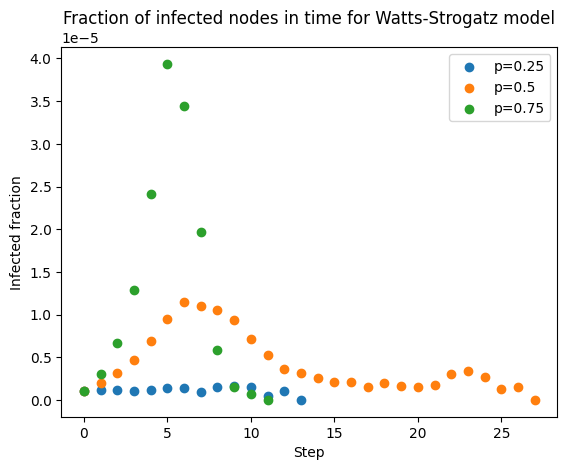

In [53]:
plt.scatter([i for i in range(WSM_infected_025.shape[1])], WSM_infected_025.mean(), label='p=0.25')
plt.scatter([i for i in range(WSM_infected_05.shape[1])], WSM_infected_05.mean(), label='p=0.5')
plt.scatter([i for i in range(WSM_infected_075.shape[1])], WSM_infected_075.mean(), label='p=0.75')
plt.title(r'Fraction of infected nodes in time for Watts-Strogatz model')
plt.xlabel('Step')
plt.legend()
plt.ylabel('Infected fraction')

In [124]:
BAM_infected_025 = SIR_on_graph_MC(BAM, 0.25, 100)
BAM_infected_05 = SIR_on_graph_MC(BAM, 0.5, 100)
BAM_infected_075 = SIR_on_graph_MC(BAM, 0.75, 100)

Text(0, 0.5, 'Infected fraction')

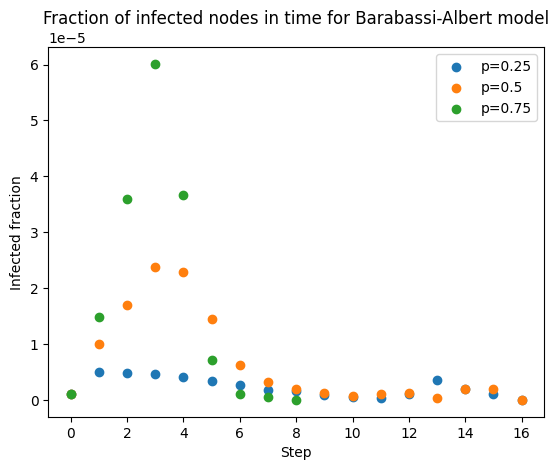

In [55]:
plt.scatter([i for i in range(BAM_infected_025.shape[1])], BAM_infected_025.mean(), label='p=0.25')
plt.scatter([i for i in range(BAM_infected_05.shape[1])], BAM_infected_05.mean(), label='p=0.5')
plt.scatter([i for i in range(BAM_infected_075.shape[1])], BAM_infected_075.mean(), label='p=0.75')
plt.title(r'Fraction of infected nodes in time for Barabassi-Albert model')
plt.xlabel('Step')
plt.legend()
plt.ylabel('Infected fraction')

In [147]:
def plot_infected(l2d, rg, wsm, bam, p=0.5):
    plt.figure(figsize=(12, 6))
    plt.scatter([i for i in range(l2d.shape[1])], l2d.mean(), label='2D lattice')
    plt.scatter([i for i in range(rg.shape[1])], rg.mean(), label='random graph')
    plt.scatter([i for i in range(wsm.shape[1])], wsm.mean(), label='Watts-Strogatz model')
    plt.scatter([i for i in range(bam.shape[1])], bam.mean(), label='Barabassi-Albert model')
    plt.title(f'Infected fraction in time for p = {p}')
    plt.xlabel('Time')
    plt.ylabel('Infected fraction')
    plt.legend()
    plt.show()

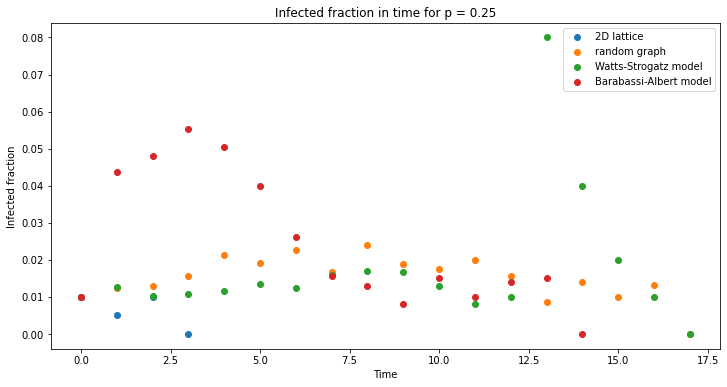

In [148]:
plot_infected(L2D_infected_025, RG_infected_025, WSM_infected_025, BAM_infected_025, 0.25)

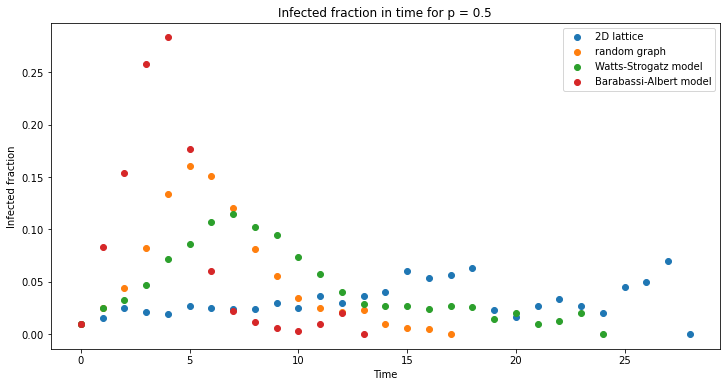

In [149]:
plot_infected(L2D_infected_05, RG_infected_05, WSM_infected_05, BAM_infected_05, 0.5)

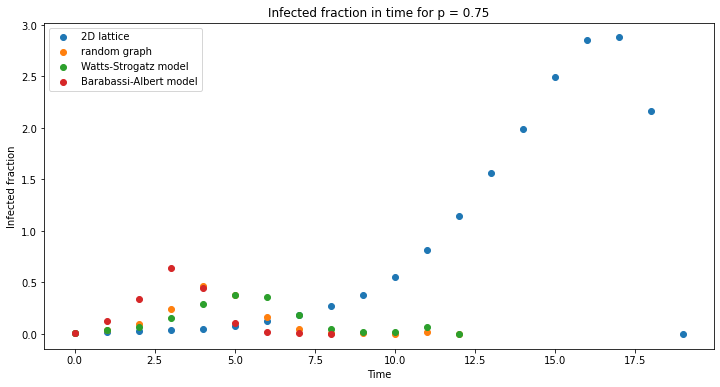

In [150]:
plot_infected(L2D_infected_075, RG_infected_075, WSM_infected_075, BAM_infected_075, 0.75)

### Analysis of SIR model on different graphs

In [11]:
def SIR_measures_MC(G, ps, steps):
    """
        Function that generates SIR model on graph for different probabilities to determine measures
        
        * G (networkx.Graph()) - graph to perform SIR model simulations on
        * ps (list or np.array) - list of probabilities of infection
        * steps (int) - number of Monte Carlo steps
    """
    df = pd.DataFrame(columns=['infected proportion', 'time to clear', 'time to large num'])
    for p in ps:
        df_new = pd.DataFrame(columns=['infected proportion', 'time to clear', 'time to large num'])
        for n in range(steps):
            res = SIR_on_graph(G, p, 'random', True)
            df_new.loc[len(df_new)] = res
        df.loc[len(df)] = df_new.mean()
    return df

In [117]:
L2D = nx.grid_2d_graph(10, 10)
RG = nx.erdos_renyi_graph(100, 0.04)
WSM = nx.watts_strogatz_graph(100, 4, 0.4)
BAM = nx.barabasi_albert_graph(100, 2)

In [7]:
ps = np.linspace(0.01, 0.99, 20)

In [19]:
res2D = SIR_measures_MC(L2D, ps, 100)

In [20]:
resRG = SIR_measures_MC(RG, ps, 100)

In [21]:
resWSM = SIR_measures_MC(WSM, ps, 100)

In [22]:
resBAM = SIR_measures_MC(BAM, ps, 100)

In [25]:
def plot_SIR_measures(res2D, resRG, resWSM, resBAM, ps):
    """
        Function that generates plots of measures needed for SIR model for different graphs
        
        *res2D (pd.DataFrame) - results for 2D lattice graph
        *resRG (pd.DataFrame) - results for random graph
        *resWSM (pd.DataFrame) - results for Watts-Strogatz graph
        *resBAM (pd.DataFrame) - results for Barabassi-Albert graph
        *ps (list or np.array) - list of probabilities of infection
    """
    plt.figure(figsize=(10, 6))
    plt.plot(ps, res2D['infected proportion'], label='2D lattice')
    plt.plot(ps, resRG['infected proportion'], label='Random Graph')
    plt.plot(ps, resWSM['infected proportion'], label='Watts-Strogatz model')
    plt.plot(ps, resBAM['infected proportion'], label='Barabassi-Albert model')
    plt.title('Total proportion of infected fraction')
    plt.xlabel('p')
    plt.ylabel('infected fraction')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(ps, res2D['time to clear'], label='2D lattice')
    plt.plot(ps, resRG['time to clear'], label='Random Graph')
    plt.plot(ps, resWSM['time to clear'], label='Watts-Strogatz model')
    plt.plot(ps, resBAM['time to clear'], label='Barabassi-Albert model')
    plt.title('Time to clear infection')
    plt.xlabel('p')
    plt.ylabel('time to clear')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(ps, res2D['time to large num'], label='2D lattice')
    plt.plot(ps, resRG['time to large num'], label='Random Graph')
    plt.plot(ps, resWSM['time to large num'], label='Watts-Strogatz model')
    plt.plot(ps, resBAM['time to large num'], label='Barabassi-Albert model')
    plt.title('Time to the largest number of infections')
    plt.xlabel('p')
    plt.ylabel('time to largest num')
    plt.legend()
    plt.show()

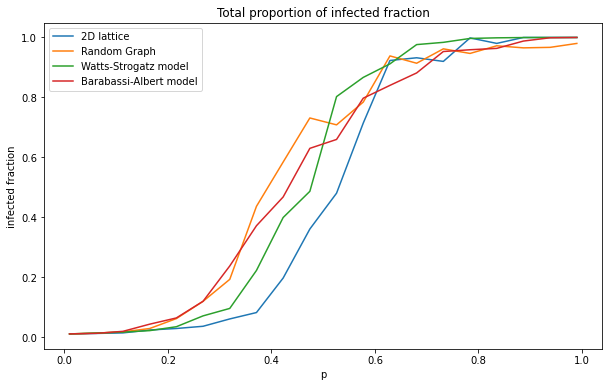

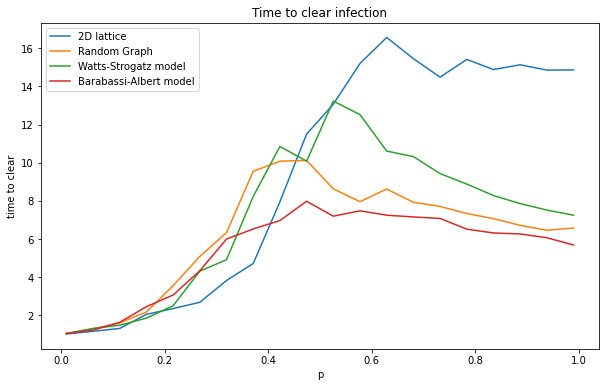

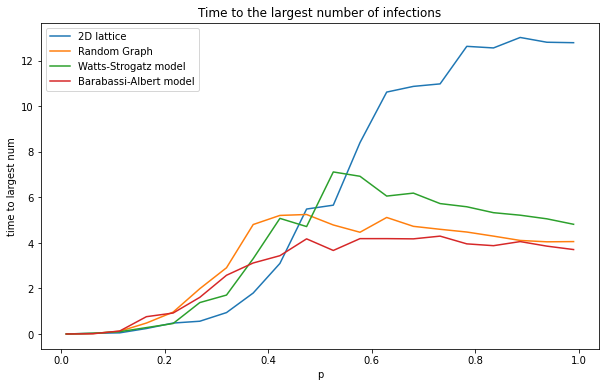

In [26]:
plot_SIR_measures(res2D, resRG, resWSM, resBAM, ps)

## Visualization of SIR model on different graphs

In [46]:
def SIR_for_gif(G, p, starting_node=0):
    """
    Function that generates SIR model simulations on a graph while resulting full state matrix for animation purpose
        
    * G (networkx.Graph()) - graph to simulate the model on
    * p (float) - probability of infection
    *starting_node (int or tuple) - first infected node
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')
    
    N = nx.number_of_nodes(G)
    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    infected_list = [starting_node]
    infected_fraction = [len(infected_list)/N]
    
    matrix = nx.get_node_attributes(G, 'state')

    while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R'] and len(infected_list)!=0:
        new_infected_list = []
        for node in infected_list:
            d[node] = 'R'
            for new_infected in G.neighbors(node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) < p:
                    d[new_infected] = 'I'
                    new_infected_list.append(new_infected)
        nx.set_node_attributes(G, d, 'state')
        infected_list = new_infected_list
        infected_fraction.append(len(infected_list)/N)
    
        label = nx.get_node_attributes(G, 'state')
        matrix = np.vstack([matrix, label])

    return matrix

In [47]:
def create_SIR_anim(G, p, gif_name="anim", starting_node=0):
    """
    Function that generates an animation of SIR on a given graph
    *G (networkx.graph()) - given graph we perform SIR model
    *p (float, 0<p<1) - probability of infection
    *gif_name (str) - name for the resulting gif file
    *starting_node (int or tuple) - first infected node
    """
    colors = {'S': 'green', 'I': 'red', 'R': 'blue'}
    results = SIR_for_gif(G, p, starting_node)
    fig, ax = plt.subplots()
    pos = nx.layout.spring_layout(G)
    
    nx.draw(G, pos=pos)
    
    def animate(i, matrix):
        ax.cla()
        labels = matrix[i][0]
        node_color = [colors[state] for state in labels.values()]
        nx.draw(G, pos=pos, labels=labels, node_color=node_color)
    
    anim = animation.FuncAnimation(fig, animate, frames=len(results), fargs=(results,))

    anim.save(f'images/{gif_name}.gif')

In [48]:
L2D = nx.grid_2d_graph(5, 6)

In [61]:
RG = nx.erdos_renyi_graph(30, 0.2)

In [59]:
WSM = nx.watts_strogatz_graph(30, 4, 0.5)

In [60]:
BAM = nx.barabasi_albert_graph(30, 4)

MovieWriter ffmpeg unavailable; using Pillow instead.


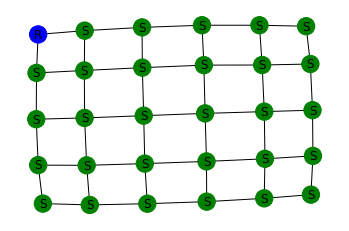

In [77]:
create_SIR_anim(L2D, 0.3, 'anim_L2D_p03', (0, 0))

MovieWriter ffmpeg unavailable; using Pillow instead.


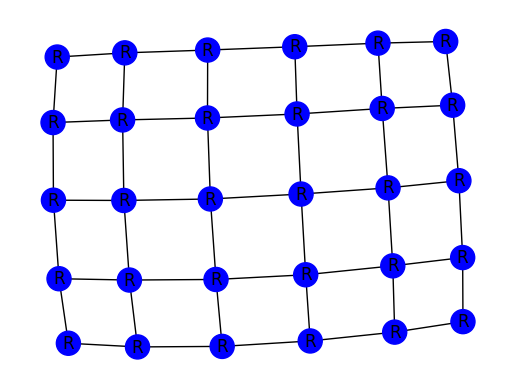

In [27]:
create_SIR_anim(L2D, 0.3, 'anim_L2D5x6_p07', (0, 0))

## Animations of SIR model on networks

#### 2D lattice graph for p = 0.5

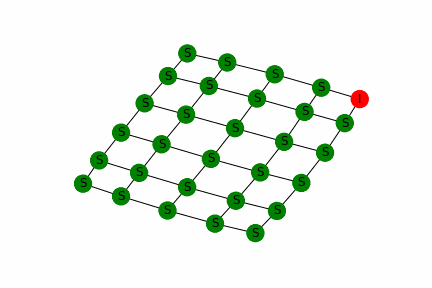

#### 2D lattice graph for p = 0.7

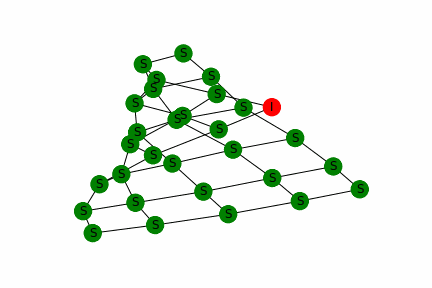

#### Random graph for p = 0.5

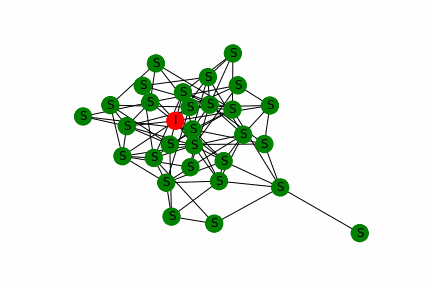

#### Watts-Strogatz model for p = 0.5

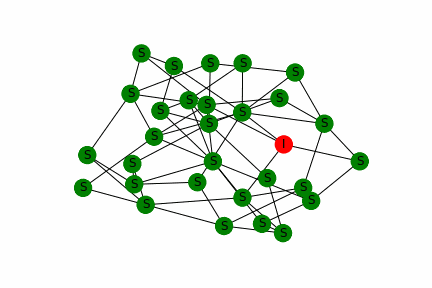

#### Barabassi-Albert model for p=0.5

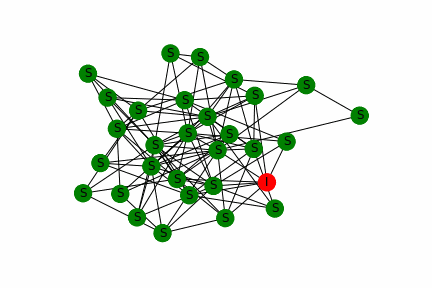

## SIR model on a network (continued)

In [30]:
def SIR_on_network_MC(G, p, starting_node=0, measures=False):
    """
        Function that generates SIR model simulations on a graph for given number of MC steps:
        
        G (networkx.Graph()) - graph to simulate the model on
        p (float) - probability of infection 
        steps (int) - number of Monte Carlo steps
        *measures (bool) - determines the output of function
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')


    if starting_node == 'random':
        starting_node = random.choice(list(G.nodes()))
    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    infected_list = [starting_node]

    chosen_node = None

    N = nx.number_of_nodes(G)
    infected_fraction = [len(infected_list)/N]
    
    t = 0
    while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R'] and len(infected_list)!=0:
        for node in range(len(list(G.nodes()))):
            if chosen_node != None:
                d[chosen_node] = 'R'
            chosen_node = random.choice(list(G.nodes()))
            for new_infected in G.neighbors(chosen_node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) < p:
                    d[new_infected] = 'I'
                    chosen_node = new_infected
            nx.set_node_attributes(G, d, 'state')
            infected_list = [x for x,y in G.nodes(data=True) if y['state']=='I']
        infected_fraction.append(len(infected_list)/N)
    
    if measures:
        time_of_max_inf = infected_fraction.index(max(infected_fraction))
        total_proportion = list(nx.get_node_attributes(G, 'state').values()).count('R')/nx.number_of_nodes(G)
        return total_proportion, t, time_of_max_inf

    return infected_fraction

In [114]:
def plot_results(l2d, rg, wsm, bam, p=0.5):
    plt.scatter(list(range(len(l2d))), l2d, label='2D lattice')
    plt.scatter(list(range(len(rg))), rg, label='random graph')
    plt.scatter(list(range(len(wsm))), wsm, label='Watts-Strogatz model')
    plt.scatter(list(range(len(bam))), bam, label='Barabassi-Albert model')
    plt.title(f'Infected fraction in time for p = {p}')
    plt.xlabel('Time')
    plt.ylabel('Infected fraction')
    plt.legend()
    plt.show()

In [125]:
L2D = nx.grid_2d_graph(10, 10)
RG = nx.erdos_renyi_graph(100, 0.04)
WSM = nx.watts_strogatz_graph(100, 4, 0.4)
BAM = nx.barabasi_albert_graph(100, 2)

In [84]:
L2Dresult = SIR_on_network_MC(L2D, 0.5, 3, (0, 0))
RGresult = SIR_on_network_MC(RG, 0.5, 3)
WSMresult = SIR_on_network_MC(WSM, 0.5, 3)
BAMresult = SIR_on_network_MC(BAM, 0.5, 3)

In [85]:
L2Dresult03 = SIR_on_network_MC(L2D, 0.25, 3, (0, 0))
RGresult03 = SIR_on_network_MC(RG, 0.25, 3)
WSMresult03 = SIR_on_network_MC(WSM, 0.25, 3)
BAMresult03 = SIR_on_network_MC(BAM, 0.25, 3)

In [86]:
L2Dresult07 = SIR_on_network_MC(L2D, 0.75, 3, (0, 0))
RGresult07 = SIR_on_network_MC(RG, 0.75, 3)
WSMresult07 = SIR_on_network_MC(WSM, 0.75, 3)
BAMresult07 = SIR_on_network_MC(BAM, 0.75, 3)

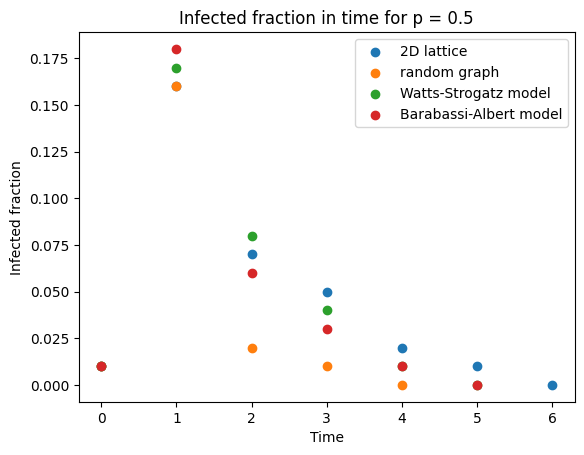

In [87]:
plot_results(L2Dresult, RGresult, WSMresult, BAMresult, 0.5)

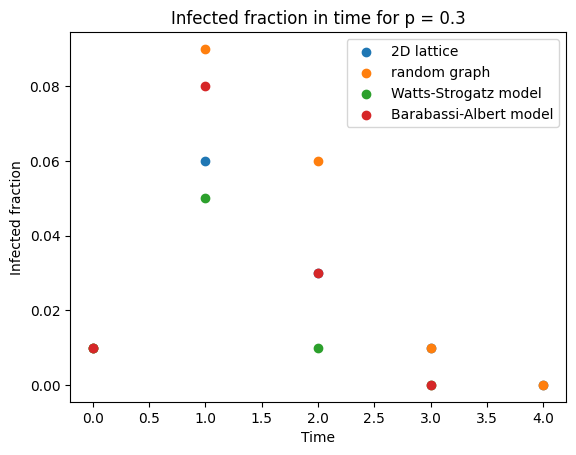

In [88]:
plot_results(L2Dresult03, RGresult03, WSMresult03, BAMresult03, 0.3)

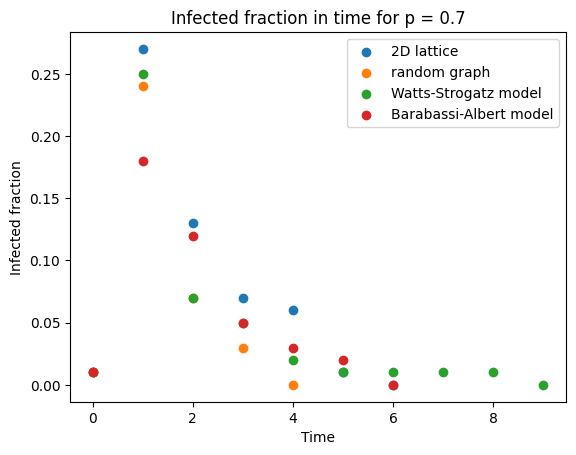

In [89]:
plot_results(L2Dresult07, RGresult07, WSMresult07, BAMresult07, 0.7)

In [27]:
def SIR_measures_MC(G, ps, steps):
    """
    Function to perform Monte Carlo simulations of SIR model on a graph. Returns the infected fraction depending on p
    
    * G (networkx.Graph()) - graph to perform SIR model simulations on
    * p (float, 0 < p < 1) - probability of infection
    * steps (int) - number of Monte Carlo steps
    """
    df = pd.DataFrame(columns=['infected proportion', 'time to clear', 'time to large num'])
    for p in ps:
        df_new = pd.DataFrame(columns=['infected proportion', 'time to clear', 'time to large num'])
        for n in range(steps):
            res = SIR_on_network_MC(G, p, 'random', True)
            df_new.loc[len(df_new)] = res
        df.loc[len(df)] = df_new.mean()
    return df

In [28]:
ps = np.linspace(0.01, 0.99, 20)

In [31]:
res2D = SIR_measures_MC(L2D, ps, 10)

In [32]:
resRG = SIR_measures_MC(RG, ps, 10)

In [33]:
resWSM = SIR_measures_MC(WSM, ps, 10)

In [34]:
resBAM = SIR_measures_MC(BAM, ps, 10)

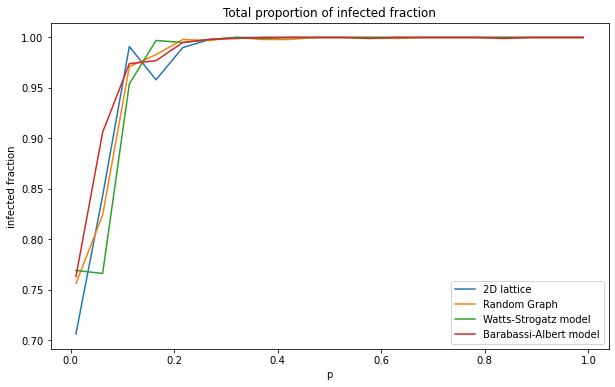

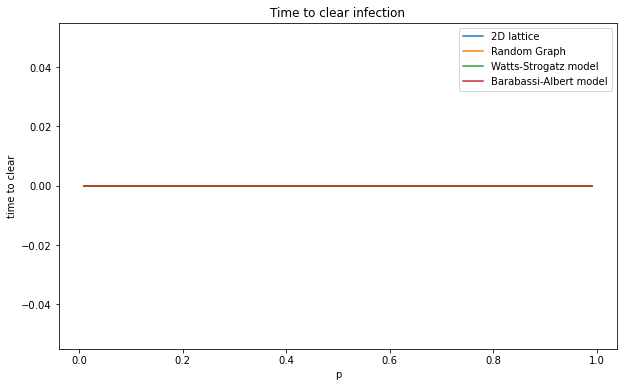

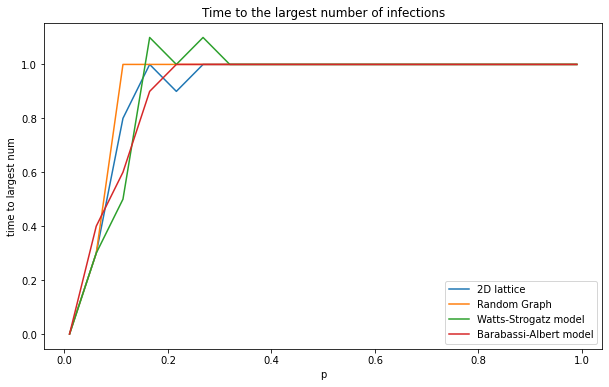

In [35]:
plot_SIR_measures(res2D, resRG, resWSM, resBAM, ps)